In [104]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [107]:
headers = ['fecha', 'velocidad']
dtypes = {'fecha': 'str', 'velocidad': 'float'}
parse_dates = ['fecha']
arduino = pd.read_csv("ANEMOM.csv",sep=',', header=None, names=headers, dtype=dtypes, parse_dates=parse_dates)

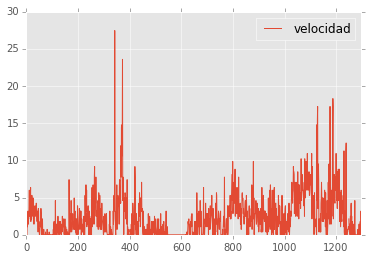

In [108]:
arduino.plot()

In [5]:
arduino_dia21 = arduino[14:89]
arduino_dia22 = arduino[89:345]
arduino_dia23 = arduino[345:602]
arduino_dia24 = arduino[602:860]
arduino_dia25 = arduino[860:1116]
arduino_dia26 = arduino[1116:]

In [6]:
import ast

In [69]:
import glob
archivos_pegasus = glob.glob("/home/emiliano/anemometro/pegasus/*.json")
pegasus_x_dia = {}
for archivo in archivos_pegasus:
    pegasus_data = open(archivo)
    archi = pegasus_data.readlines()
    timestamp = []
    velocidad = []
    for i, linea in enumerate(archi):
        if "timestamp" in linea:
            timestamp.append((linea.split(":")[1]+":"+linea.split(":")[2]+":"+linea.split(":")[3]).split(",")[0])
        if "vdv" in linea:
            try:
                velocidad.append(float(archi[i+3].split(":")[1].split(",")[0]))
            except:
                velocidad.append(0)
    pegasus_x_dia[archivo[-15:]] = pd.DataFrame({'fecha':timestamp, 'velocidad':velocidad})

In [70]:
pegasus_dia21 = pegasus_x_dia['2016-12-21.json']
pegasus_dia22 = pegasus_x_dia['2016-12-22.json']
pegasus_dia23 = pegasus_x_dia['2016-12-23.json']
pegasus_dia24 = pegasus_x_dia['2016-12-24.json']
pegasus_dia25 = pegasus_x_dia['2016-12-25.json']
pegasus_dia26 = pegasus_x_dia['2016-12-26.json']

In [11]:
#pegasus_dia21 = pd.DataFrame({'fecha':timestamp, 'velocidad':velocidad})

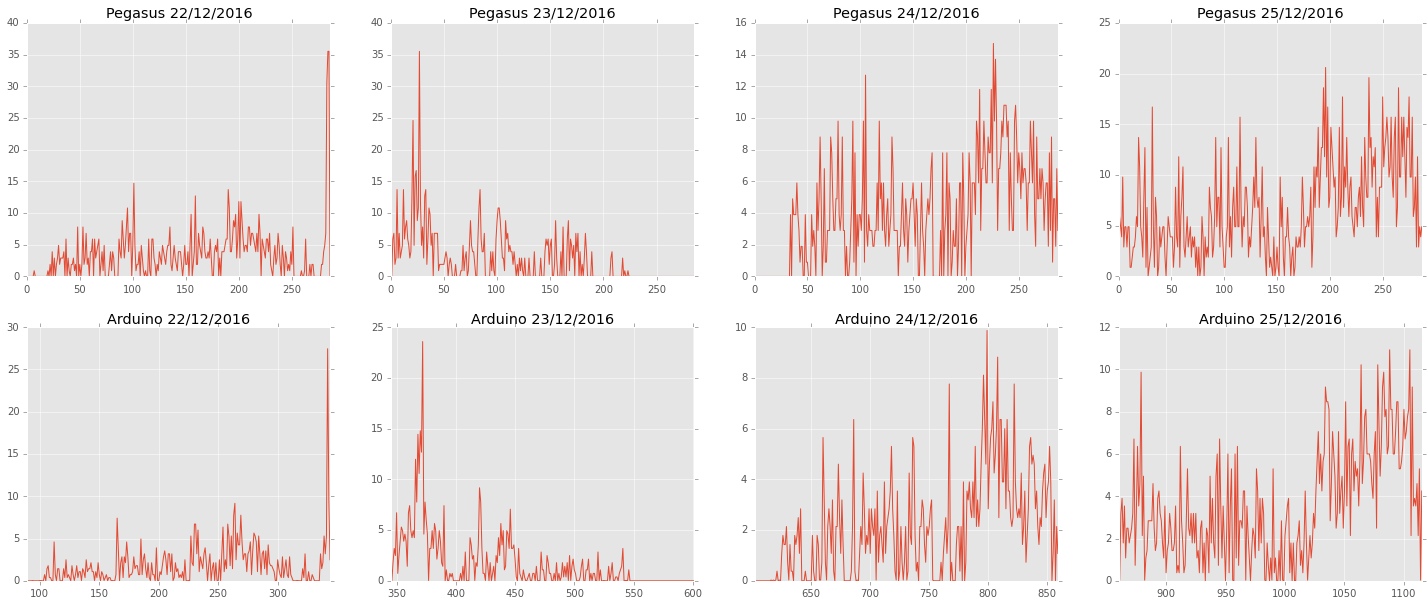

In [96]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

pegasus_dia22.plot(ax=axes[0,0], legend=False) 
axes[0,0].set_title('Pegasus 22/12/2016')

arduino_dia22.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Arduino 22/12/2016')

pegasus_dia23.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Pegasus 23/12/2016')

arduino_dia23.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Arduino 23/12/2016')

pegasus_dia24.plot(ax=axes[0,2], legend=False)
axes[0,2].set_title('Pegasus 24/12/2016')

arduino_dia24.plot(ax=axes[1,2], legend=False)
axes[1,2].set_title('Arduino 24/12/2016')

pegasus_dia25.plot(ax=axes[0,3], legend=False)
axes[0,3].set_title('Pegasus 25/12/2016')

arduino_dia25.plot(ax=axes[1,3], legend=False)
axes[1,3].set_title('Arduino 25/12/2016')

pandas.tslib.Timestamp